In [6]:
#import torch
import matplotlib.pyplot as plt
import numpy as np
#import torch
#import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
#import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
#from torchvision import transforms, datasets
import cv2
#from torchvision import transforms, datasets
import pandas as pd
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt


#if torch.cuda.is_available():
#    DEVICE = torch.device('cuda')
#else:
#    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
#print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)



오디오들이 
1초, 2초, 3초 각각 다르다.

음성이 뭉개진 데이터도 있다.

# 추출해야하는 feature

- time-frequency : 13 MFCC  
- pitch, rolloff, ZCR, energy entropy, spectral flux,  spectral centroid, energy

### 오디오 전처리

https://hyunlee103.tistory.com/36

https://hyongdoc.tistory.com/404

https://ichi.pro/ko/python-eul-sayonghan-eum-ag-jangleu-bunlyu-218892206272728

https://lucaseo.github.io/posts/2021-01-22-hands-on-preprocess-audio-data/ : librosa 설명

torchaudio

https://ahnjg.tistory.com/93

https://medium.com/analytics-vidhya/how-to-classify-sounds-using-pytorch-27c9f2d4d714 :mfcc

https://www.youtube.com/watch?v=rlypsap6Wow&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0&index=8

https://www.youtube.com/watch?v=oltGIc4uo5c&t=5132s 피처들


torchaudio를 사용해 음성을 읽으면 음성 데이터와 sampling rate를 반환.

sampling rate : 1초당 들리는 sample의 개수 (1초를 더 쪼갠것)

데이터 길이 / sampling rate = 음성 파일의 시간

In [7]:
!pip install torchaudio

------

In [8]:
!pip install librosa --user

In [12]:
#!pip install numba==0.53# numpy 버전 맞추기 위해서

  Using cached numba-0.53.0-cp38-cp38-win_amd64.whl (2.3 MB)
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'D:\\miniconda3\\envs\\local_torch\\Lib\\site-packages\\~umba\\core\\runtime\\_nrt_python.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import numpy as np
np.__version__

'1.21.5'

In [14]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=50000

#audio_path = './voice_data/disorder/export/blues.00000.wav'
#audio_path = './voice_data/disorder/export/105-phrase.wav'
audio_path = './voice_data/fusion/pathology/phrase/105-phrase.wav'
sig, sr = librosa.load(audio_path, sr=sr)# 논문에서 f_s = 50 000HZ
length=101951
pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
sig = pad1d(sig,length)  

#모음데이터는 1초에서 3초로 sampling 했다고 한다. (2초)

print(sig.shape,sr)
print(sig.shape[0]/sr)
sr_time=sig.shape[0]/sr




#155269 sample임을 알 수 있고
#sampling frame이 50000이다.
#시간 : 155269/50000

#음성 파일마다 sample수가 달라서, cnn은 통일해야한다.
#통일안하면, mfcc frame수도 달라진다.

(101951,) 50000
2.03902


In [15]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

#audio_path = './voice_data/disorder/export/blues.00000.wav'
#audio_path = './voice_data/disorder/export/105-phrase.wav'
audio_path = './voice_data/fusion/pathology/a/107-a_n.wav'
sig_healthy, sr_sig_healthy = librosa.load(audio_path, sr=50000)# 논문에서 f_s = 50 000HZ
#length=318596
#sig = pad1d(sig_healthy,length)  


#모음데이터는 1초에서 3초로 sampling 했다고 한다. (2초)

print(sig.shape,sr)
print(sig.shape[0]/sr)
sr_time_sig_healthy=sig.shape[0]/sr
print(sr_time_sig_healthy)
#155269 sample임을 알 수 있고
#sampling frame이 50000이다.
#시간 : 155269/50000

#음성 파일마다 sample수가 달라서, cnn은 통일해야한다.
#통일안하면, mfcc frame수도 달라진다.

(101951,) 50000
2.03902
2.03902


In [17]:
healthy_audios = []
disorder_audios = []

healthy_audios.append('./voice_data/fusion/healthy/phrase/1-phrase.wav')
healthy_audios.append('./voice_data/fusion/healthy/phrase/2-phrase.wav')
healthy_audios.append('./voice_data/fusion/healthy/phrase/3-phrase.wav')

disorder_audios.append('./voice_data/fusion/pathology/phrase/108-phrase.wav')
disorder_audios.append('./voice_data/fusion/pathology/phrase/109-phrase.wav')
disorder_audios.append('./voice_data/fusion/pathology/phrase/110-phrase.wav')


healthy_audios =[ librosa.load(aud, sr=50000)[0] for aud in healthy_audios ]
disorder_audios =[ librosa.load(aud, sr=50000)[0] for aud in disorder_audios ]



Text(0.5, 1.0, 'Waveform')

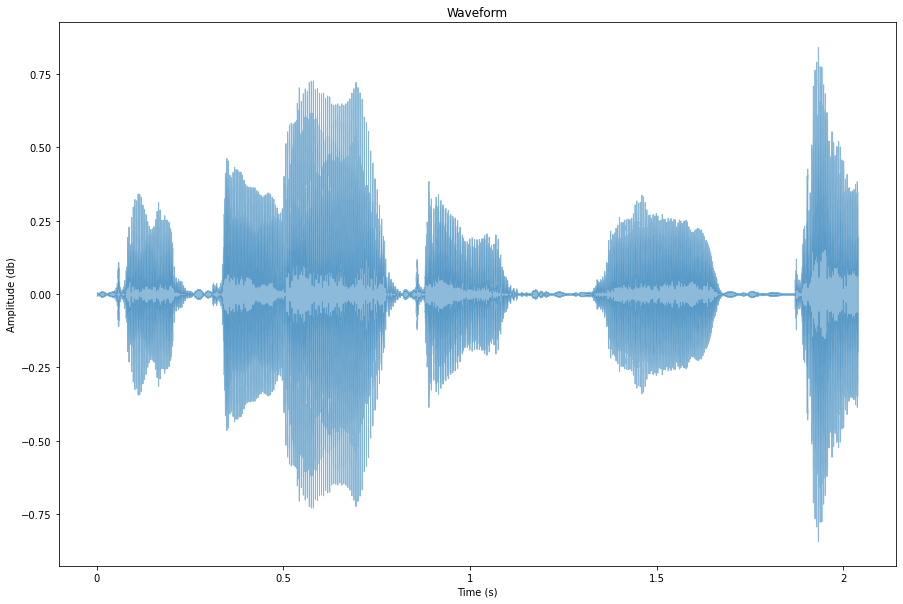

In [18]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(sig, sr=sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (db)")
plt.title("Waveform")

https://newsight.tistory.com/294

## 단순 푸리에 변환 → Spectrum

Text(0.5, 1.0, 'Power spectrum')

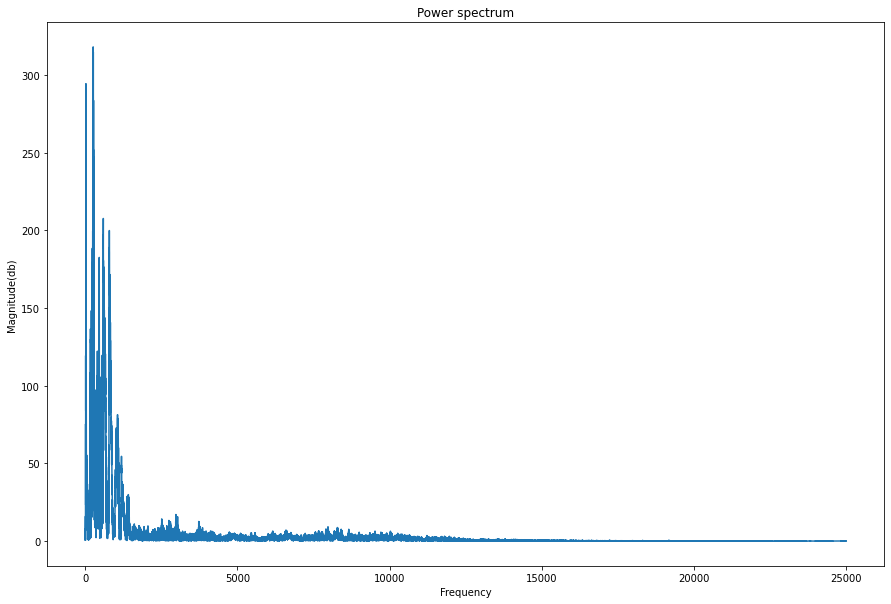

In [19]:
fft = np.fft.fft(healthy_audios[0])

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
#left_spectrum = magnitude
#left_f=f
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude(db)")
plt.title("Power spectrum")

In [13]:
np.max(healthy_audios[0])

0.24664307

Text(0.5, 1.0, 'Power spectrum')

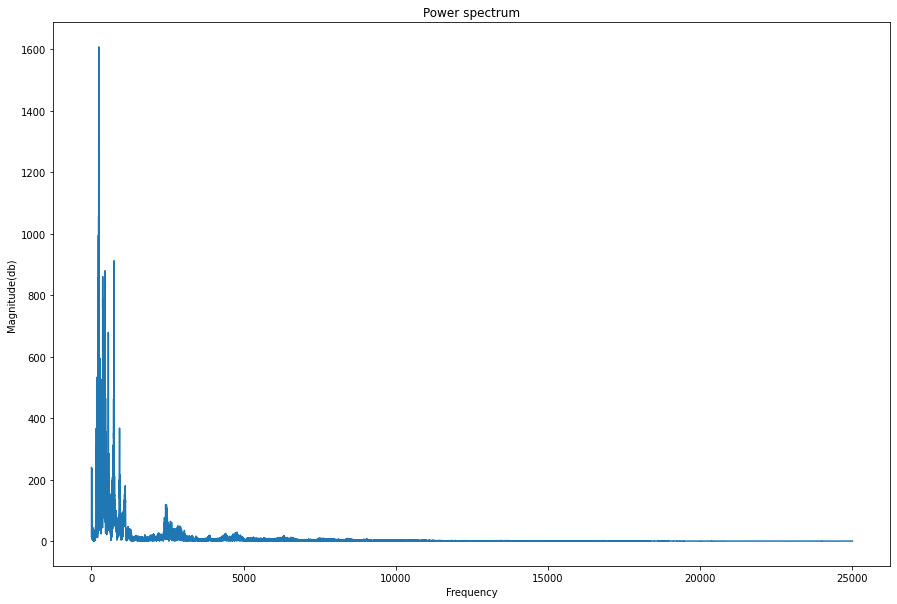

In [20]:
fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
#left_spectrum = magnitude
#left_f=f
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude(db)")
plt.title("Power spectrum")

In [1]:
101951

101951

In [22]:
sig.shape[0]

101951

In [21]:
np.int64(np.ceil(1250/4))

313

# STFT

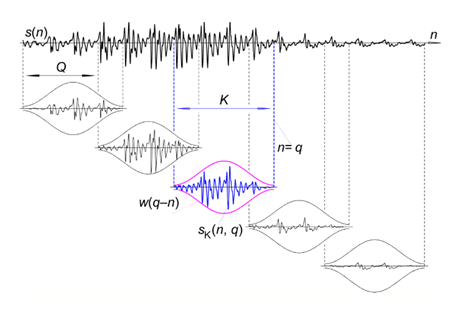

- https://sanghyu.tistory.com/38?category=1120070

In [25]:
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다. (stride)
#hop: 윈도우가 겹치는 사이즈

stfts=librosa.stft(sig,win_length=win_length,n_fft=n_fft, hop_length=hop_length)
print(len(stfts[0]))

326


In [24]:
sig.shape[0]

101951

# MFCC

- window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
- 자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
- 초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
- nfft : WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
- hop_length : 얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4 또는 10ms만큼으로 한다고 한다. hop_length가 mfcc의 frame수를 결정한다.


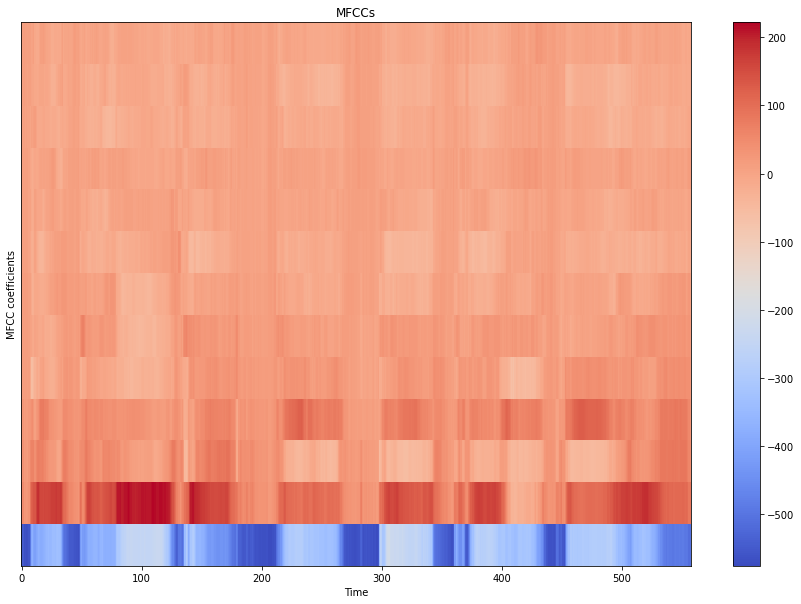

(13, 558)


In [14]:
# MFCCs
#librosa에서는 stft로 수행해서, 시간 정보를 보존하기 위해 frame단위로 fft 수행.
# extract 13 MFCCs

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다. (stride)
#hop: 윈도우가 겹치는 사이즈

#hop_length가 mfcc의 frame수를 결정한다.


MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
#MFCCs=cv2.resize(MFCCs,(224,224),interpolation=cv2.INTER_LINEAR)# interpolate 적용해서 300 사이즈로
#scaler.fit(MFCCs)
#MFCCs=scaler.transform(MFCCs)

#length=300

#pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
#MFCCs = pad2d(MFCCs, length)


# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")

plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()
print(MFCCs.shape)
# 497 frame(time step).
# 497 frame 만큼 RNN에서 시점을 가진다.

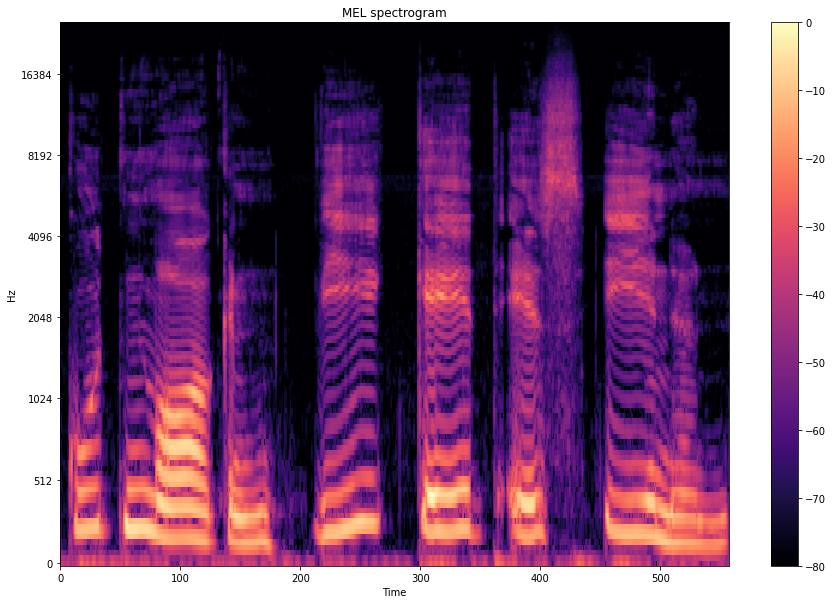

(128, 558)


In [17]:
# MFCCs
#librosa에서는 stft로 수행해서, 시간 정보를 보존하기 위해 frame단위로 fft 수행.
# extract 13 MFCCs

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다. (stride)
#hop: 윈도우가 겹치는 사이즈

#hop_length가 mfcc의 frame수를 결정한다.


mel = librosa.feature.melspectrogram(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length)
mel = librosa.core.power_to_db(mel,ref=np.max)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='frames', y_axis='mel')
plt.xlabel("Time")

plt.ylabel("Hz")
plt.colorbar()
plt.title("MEL spectrogram")

# show plots
plt.show()
print(mel.shape)
# 497 frame(time step).
# 497 frame 만큼 RNN에서 시점을 가진다.

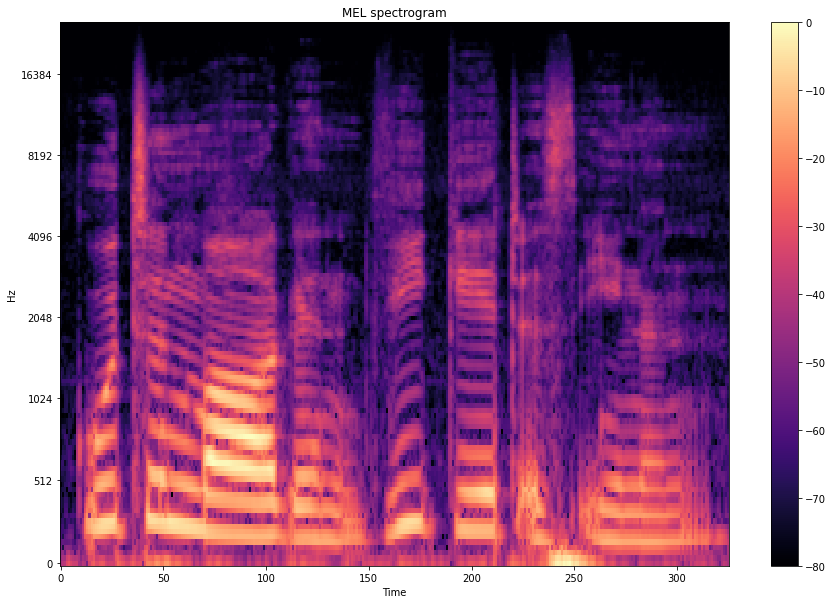

(128, 326)


In [18]:
# MFCCs
#librosa에서는 stft로 수행해서, 시간 정보를 보존하기 위해 frame단위로 fft 수행.
# extract 13 MFCCs

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다. (stride)
#hop: 윈도우가 겹치는 사이즈

#hop_length가 mfcc의 frame수를 결정한다.


mel = librosa.feature.melspectrogram(y=healthy_audios[0], sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length)
mel = librosa.core.power_to_db(mel,ref=np.max)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='frames', y_axis='mel')
plt.xlabel("Time")

plt.ylabel("Hz")
plt.colorbar()
plt.title("MEL spectrogram")

# show plots
plt.show()
print(mel.shape)
# 497 frame(time step).
# 497 frame 만큼 RNN에서 시점을 가진다.

https://0equal2.tistory.com/144?category=477936

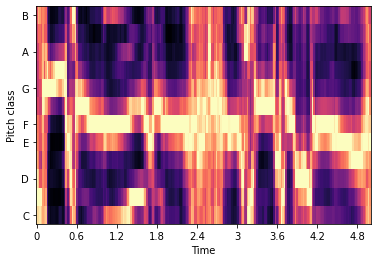

In [17]:

S = np.abs(librosa.stft(disorder_audios[0]))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')

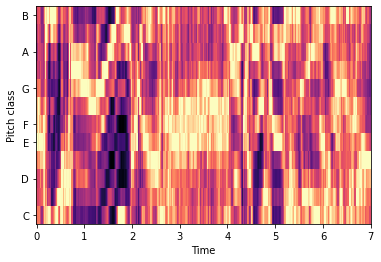

In [18]:

S = np.abs(librosa.stft(disorder_audios[1]))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')

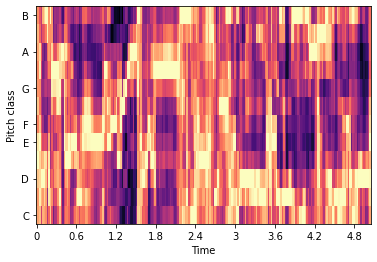

In [20]:

S = np.abs(librosa.stft(disorder_audios[2]))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')

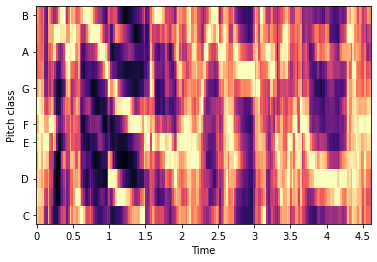

In [21]:

S = np.abs(librosa.stft(healthy_audios[0]))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')

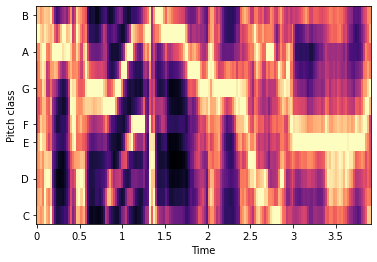

In [22]:

S = np.abs(librosa.stft(healthy_audios[1]))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')

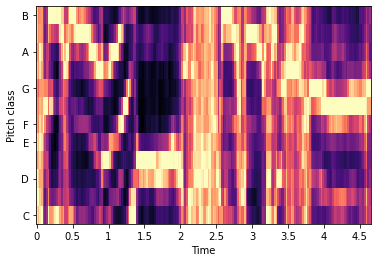

In [23]:

S = np.abs(librosa.stft(healthy_audios[2]))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')

In [20]:
import matplotlib.pyplot as plt
import scipy

#y, sr = librosa.load(librosa.ex('libri1'), duration=0.020)
a = librosa.lpc(sig, order=30)
b = np.hstack([[0], -1 * a[1:]])

In [21]:
a

array([ 1.0000000e+00, -2.9205847e+00,  4.3633127e+00, -4.7490582e+00,
        4.1353178e+00, -3.1085873e+00,  2.0885766e+00, -1.3724244e+00,
        8.8139713e-01, -5.3400791e-01,  3.6284876e-01, -2.6913479e-01,
        2.3296504e-01, -2.1696630e-01,  1.5579513e-01, -1.9650515e-03,
       -1.5195477e-01,  1.4293960e-01, -5.0177667e-02, -5.7505865e-02,
        1.4720389e-01, -2.0230772e-01,  2.0133854e-01, -1.7503569e-01,
        1.7728499e-01, -4.2883091e-02, -8.8558793e-03,  2.6637435e-02,
       -3.6736801e-02,  2.5436424e-02, -3.8002387e-02], dtype=float32)

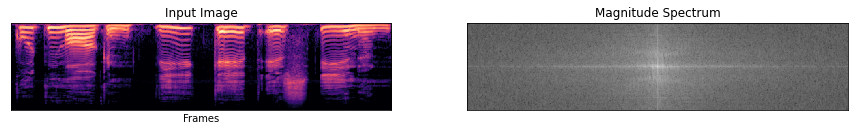

In [45]:
plt.figure(figsize=FIG_SIZE)
f = np.fft.fft2(mel)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(mel, cmap = 'gray')
librosa.display.specshow(mel, sr=sr, hop_length=hop_length,x_axis='frames')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [46]:
f.shape

(128, 558)

(Text(0.5, 1.0, 'Image after HPF'), ([], []), ([], []))

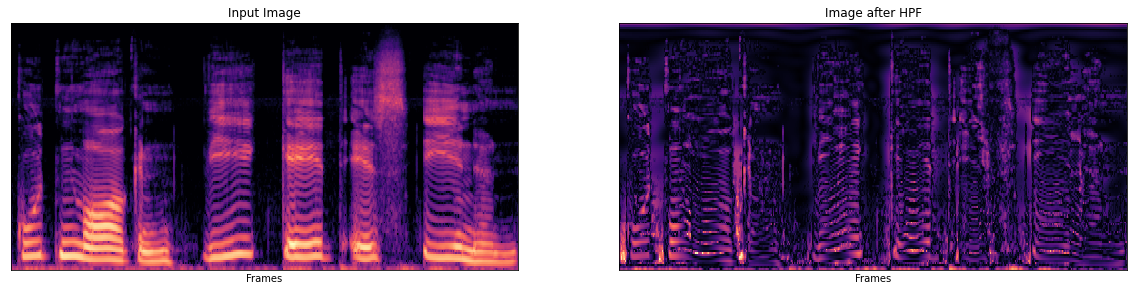

In [43]:
plt.figure(figsize=(20,10))
rows,cols = f.shape
crow,ccol = (int)(rows/2),(int)(cols/2)
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.subplot(221)
librosa.display.specshow(mel, sr=sr, hop_length=hop_length,x_axis='frames')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222)
librosa.display.specshow(img_back, sr=sr, hop_length=hop_length,x_axis='frames')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

Text(0.5, 0, 'Time')

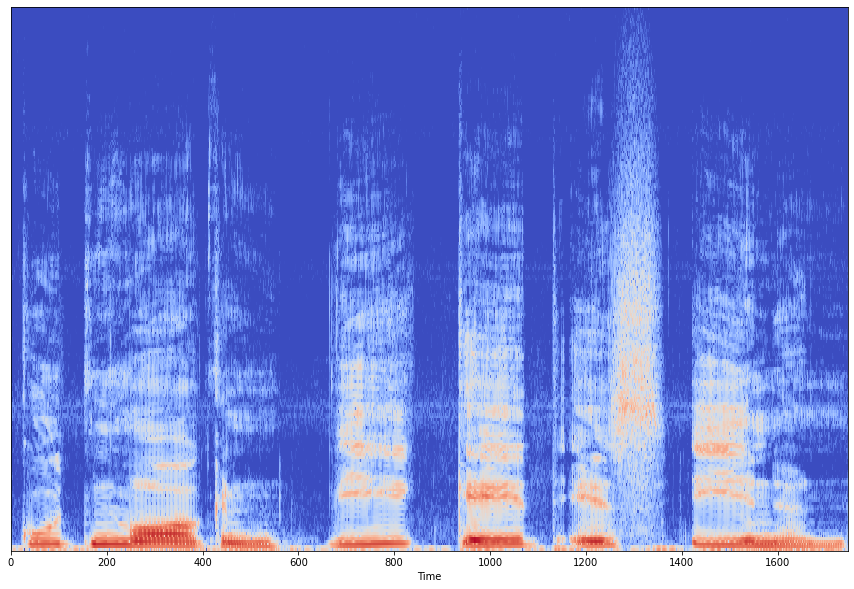

In [27]:
sr=16000
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")

Text(0.5, 0, 'Time')

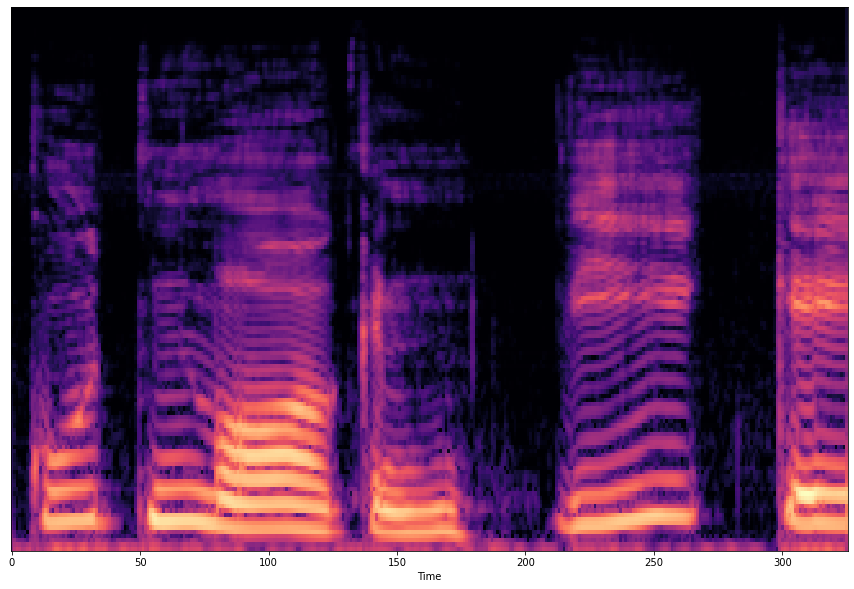

In [31]:
# stft -> mel-spectro 가능.
# log spectro -> mel-spectro 가능한가? ( db_to_amplitude + **2 을 통해 power spectrum을 만들어준다.)
# mel spectro -> mfcc 가능.


sr=50000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4


stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

power_spectro = librosa.db_to_amplitude(log_spectrogram)**2


#D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=power_spectro, sr=sr)
S = librosa.core.power_to_db(S,ref=np.max)


plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(S, sr=sr, hop_length=hop_length,x_axis='frames')
plt.xlabel("Time")

In [33]:
sig.shape

(101951,)

In [55]:
# MFCCs
#librosa에서는 stft로 수행해서, 시간 정보를 보존하기 위해 frame단위로 fft 수행.
# extract 13 MFCCs

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.

win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다. (stride)
#hop: 윈도우가 겹치는 사이즈

#hop_length가 mfcc의 frame수를 결정한다.


MFCCs = librosa.feature.mfcc(sig_healthy, sr_sig_healthy,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()
print(MFCCs.shape)
# 497 frame(time step).
# 497 frame 만큼 RNN에서 시점을 가진다.

TypeError: mfcc() takes 0 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

# STFT

### MFCC 497 frame을 시간으로 다시 변환

 round( sample수 / hop_length )= 497 frame
 
 497frame * hop_length = sample 수


In [2]:
np.ceil(101951/313)

NameError: name 'np' is not defined

In [40]:
497*313

155561

497 frame (50,000 sr) ->  3.1초


MFCC 500 frame을 기준으로 길이 고정.

In [41]:
500*313

156500

In [16]:
np.ceil(156200/313)

500.0

## 시간을 기준으로 자르기

sample_rate * 시간


In [7]:
50000 * 2.5

125000.0

In [6]:
np.ceil(125000/313)

400.0

# 제로 크로싱

In [4]:
zero_crossing = librosa.zero_crossings()

TypeError: zero_crossings() missing 1 required positional argument: 'y'

# 스펙트로그램

Text(0.5, 1.0, 'Spectrogram (dB)')

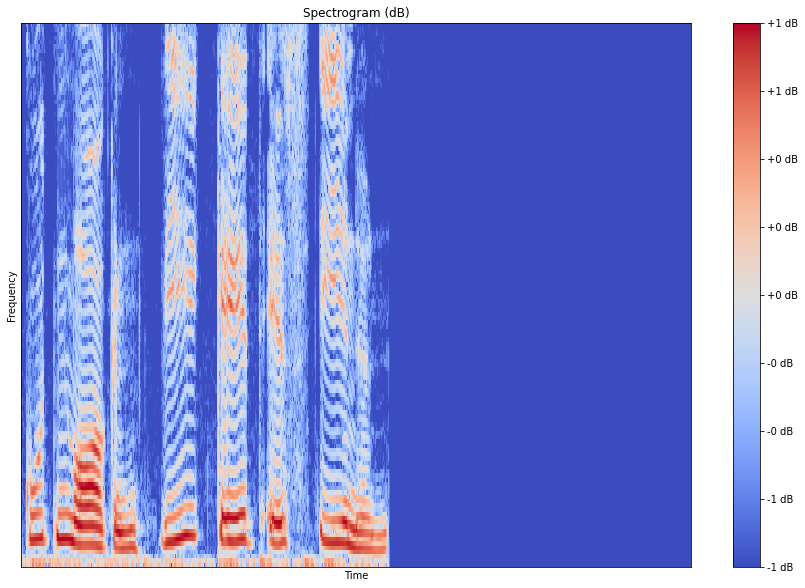

In [9]:
stfts=librosa.stft(sig,win_length=win_length,n_fft=n_fft, hop_length=hop_length)
plt.figure(figsize=FIG_SIZE)
magnitude = np.abs(stfts)
log_spectrogram = librosa.amplitude_to_db(magnitude)
log_spectrogram=librosa.util.normalize(log_spectrogram) # l-infinity norm

log_spectrogram = log_spectrogram[:128,:]


librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)




plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

In [14]:
print(stfts.shape)

(626, 497)


Text(0.5, 1.0, 'Spectrogram (dB)')

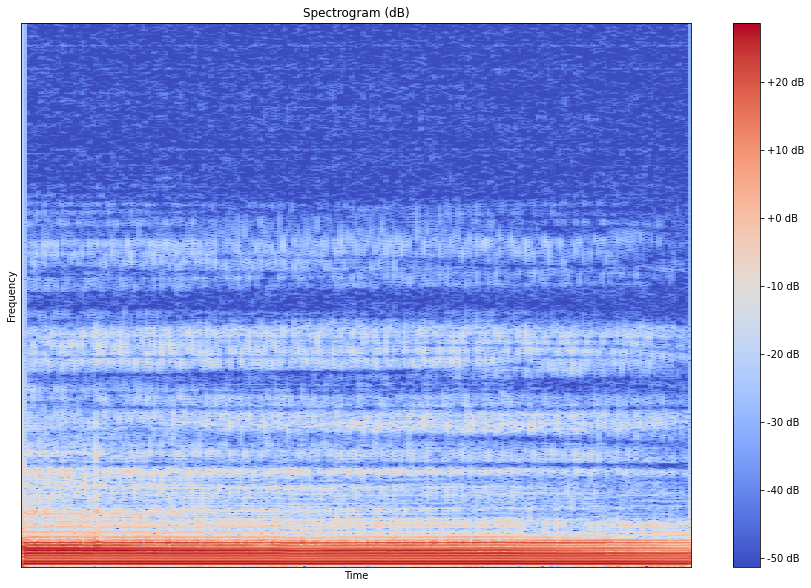

In [10]:
#healthy
stfts=librosa.stft(sig_healthy,win_length=win_length,n_fft=n_fft, hop_length=hop_length)
plt.figure(figsize=FIG_SIZE)
magnitude = np.abs(stfts)
log_spectrogram = librosa.amplitude_to_db(magnitude)
librosa.display.specshow(log_spectrogram, sr=sr_sig_healthy, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'Spectrogram (dB)')

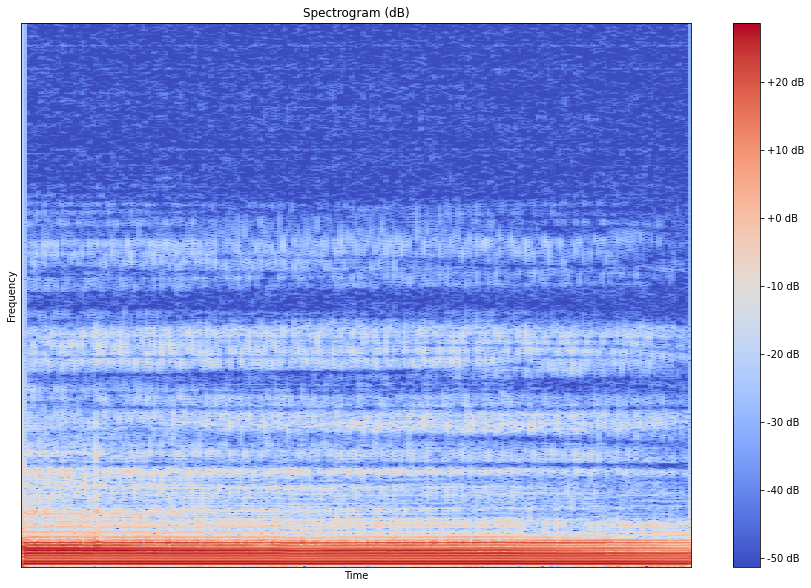

In [11]:
#healthy
stfts=librosa.stft(sig_healthy,win_length=win_length,n_fft=n_fft, hop_length=hop_length)
plt.figure(figsize=FIG_SIZE)
magnitude = np.abs(stfts)
log_spectrogram = librosa.amplitude_to_db(magnitude)
librosa.display.specshow(log_spectrogram, sr=sr_sig_healthy, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

In [22]:
print(stfts.shape)

(626, 328)


<Figure size 1080x720 with 0 Axes>

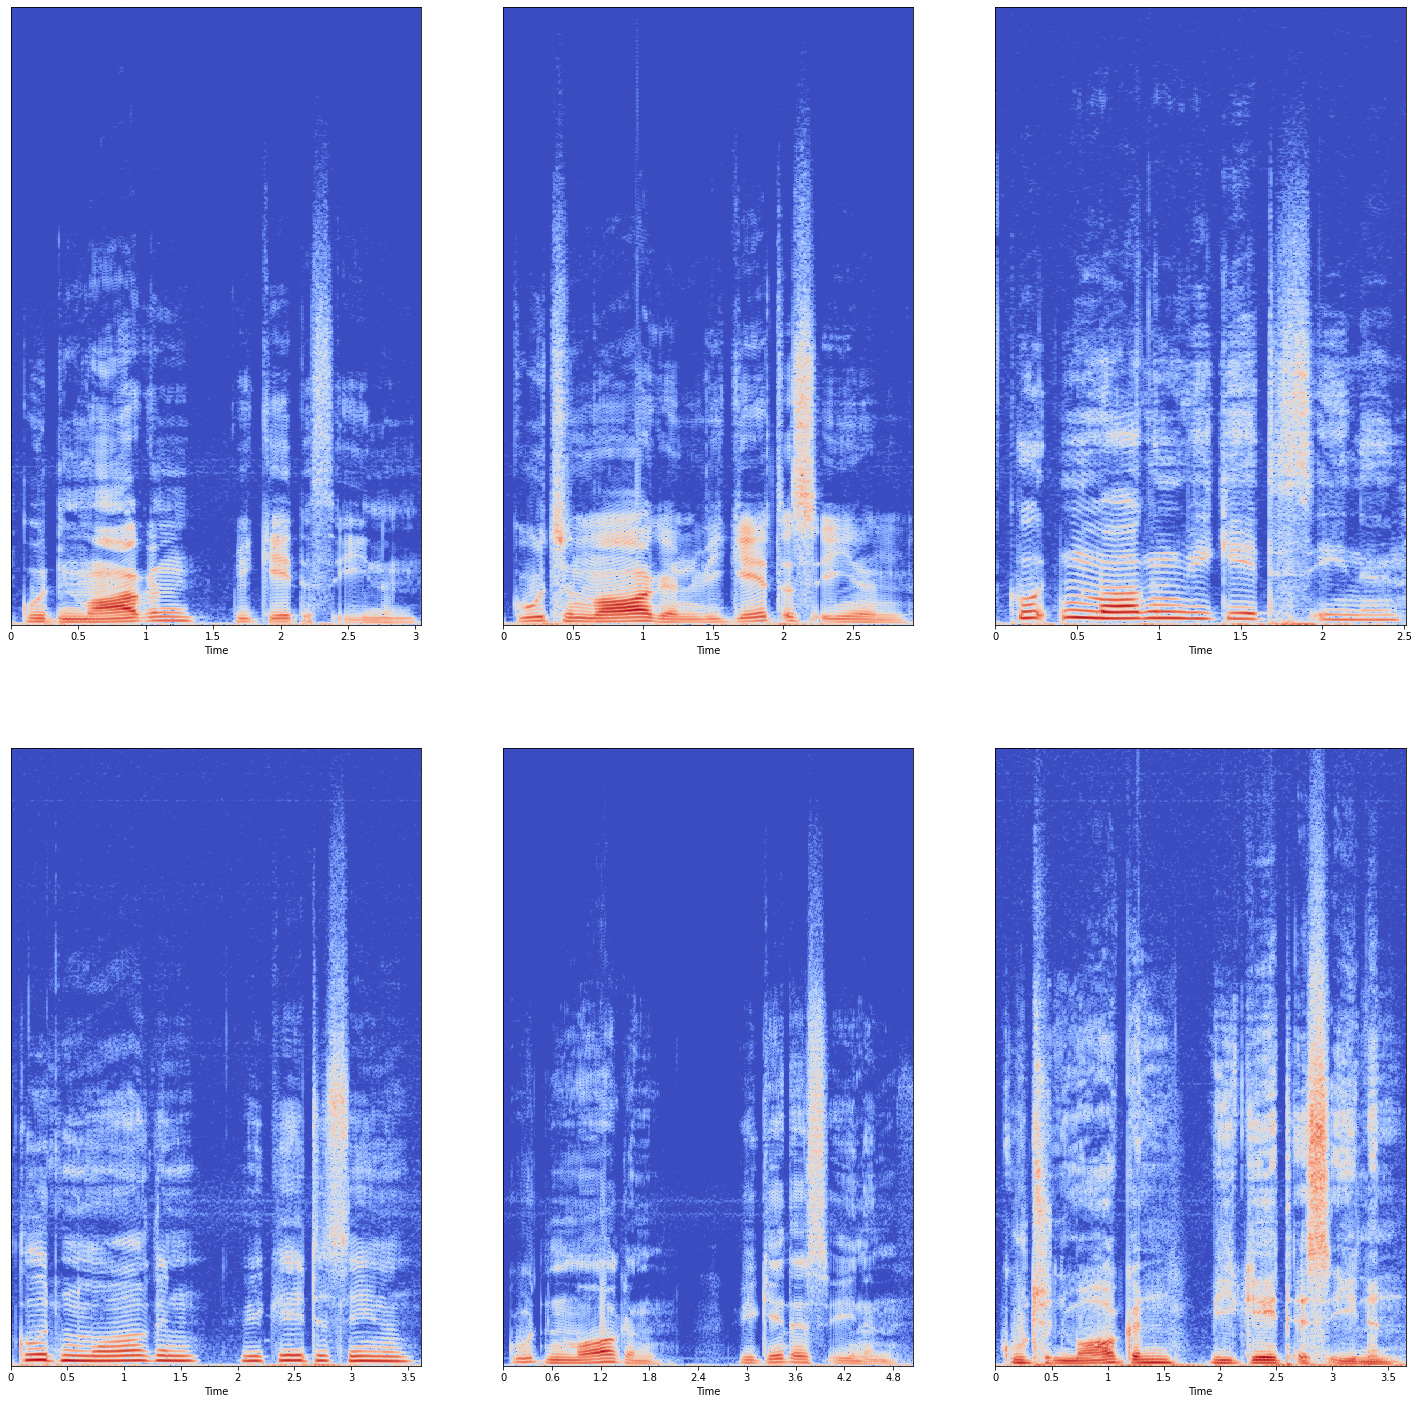

In [16]:
fig = plt.figure(figsize=(15,10))

stfts_healthy=[librosa.stft(healthy,win_length=win_length,n_fft=n_fft, hop_length=hop_length) for healthy in healthy_audios ]
stfts_disorder=[librosa.stft(healthy,win_length=win_length,n_fft=n_fft, hop_length=hop_length) for healthy in disorder_audios ]


stfts_healthy = [ librosa.amplitude_to_db(np.abs(healthy)) for healthy in stfts_healthy ]
stfts_disorder = [ librosa.amplitude_to_db(np.abs(healthy)) for healthy in stfts_disorder ]

plt.figure(figsize=(25,25))


plt.subplot(231)
librosa.display.specshow(stfts_healthy[0], sr=50000, x_axis='time',y_axis)
plt.subplot(232)
librosa.display.specshow(stfts_healthy[1], sr=50000, x_axis='time')
plt.subplot(233)
librosa.display.specshow(stfts_healthy[2], sr=50000, x_axis='time')

plt.subplot(234)
librosa.display.specshow(stfts_disorder[0], sr=50000, x_axis='time')
plt.subplot(235)
librosa.display.specshow(stfts_disorder[1], sr=50000, x_axis='time')
plt.subplot(236)
librosa.display.specshow(stfts_disorder[2], sr=50000, x_axis='time')

# 멜 스펙트로그램

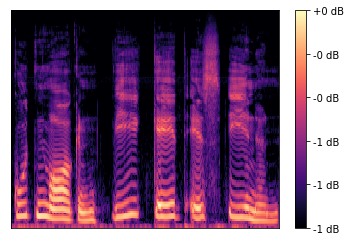

In [17]:
mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm

librosa.display.specshow(mel_feature, sr=sr, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')


In [ ]:
np.resize(mel_feature,)

(128, 328)


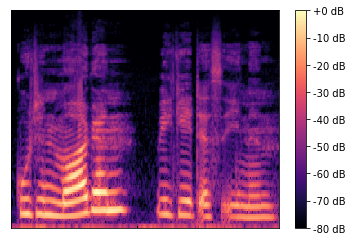

In [29]:
mel_feature = librosa.feature.melspectrogram(sig_healthy,sr=sr_sig_healthy,hop_length=hop_length,n_fft=n_fft)
print(mel_feature.shape)
mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
librosa.display.specshow(mel_feature, sr=sr, hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')


<Figure size 1080x720 with 0 Axes>

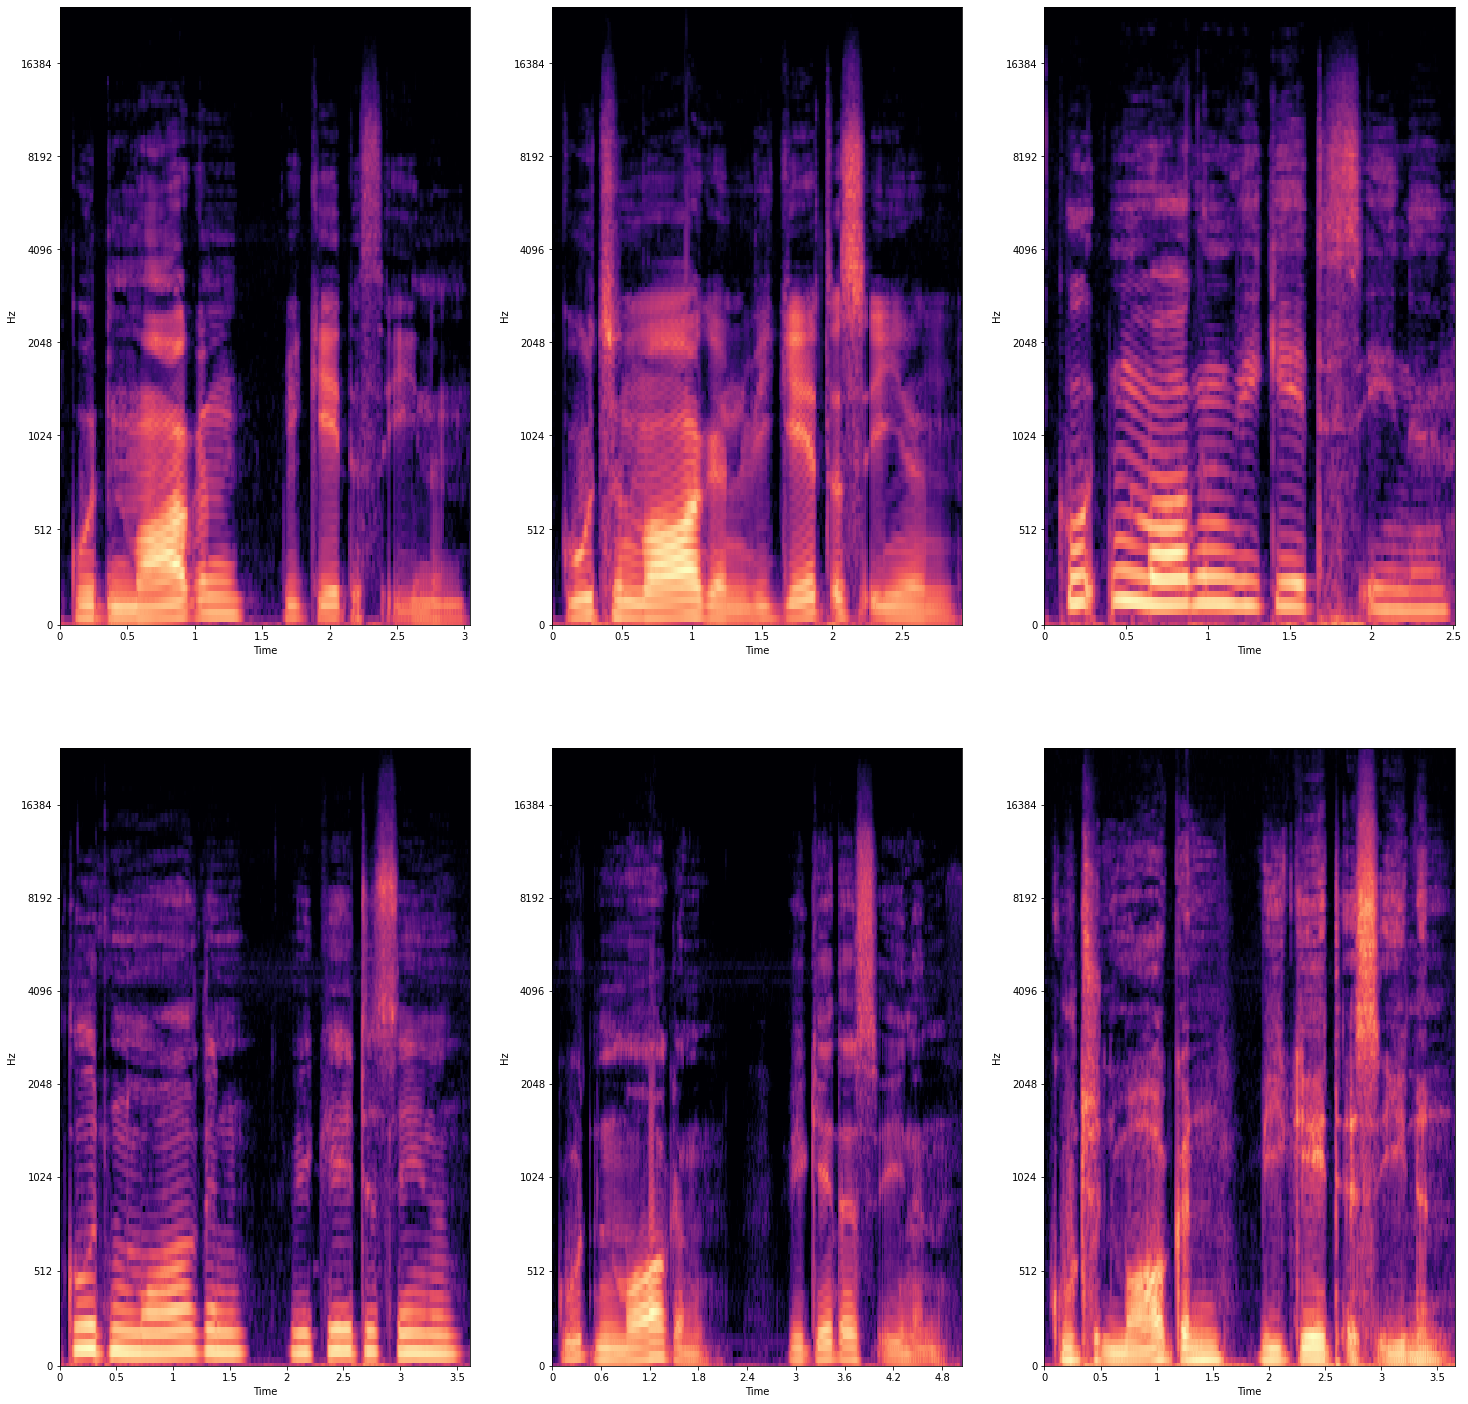

In [30]:
fig = plt.figure(figsize=(15,10))

mel_healthy=[librosa.feature.melspectrogram(healthy,win_length=win_length,n_fft=n_fft, hop_length=hop_length) for healthy in healthy_audios ]
mel_disorder=[librosa.feature.melspectrogram(healthy,win_length=win_length,n_fft=n_fft, hop_length=hop_length) for healthy in disorder_audios ]


mel_healthy = [ librosa.core.power_to_db(healthy,ref=np.max) for healthy in mel_healthy ]
mel_disorder = [ librosa.core.power_to_db(healthy,ref=np.max) for healthy in mel_disorder ]

plt.figure(figsize=(25,25))


plt.subplot(231)
librosa.display.specshow(mel_healthy[0], sr=50000, x_axis='time',y_axis='mel')
plt.subplot(232)
librosa.display.specshow(mel_healthy[1], sr=50000, x_axis='time',y_axis='mel')
plt.subplot(233)
librosa.display.specshow(mel_healthy[2], sr=50000, x_axis='time',y_axis='mel')

plt.subplot(234)
librosa.display.specshow(mel_disorder[0], sr=50000, x_axis='time',y_axis='mel')
plt.subplot(235)
librosa.display.specshow(mel_disorder[1], sr=50000, x_axis='time',y_axis='mel')
plt.subplot(236)
librosa.display.specshow(mel_disorder[2], sr=50000, x_axis='time',y_axis='mel')

# 분해

Text(0.5, 1.0, 'Spectrogram (dB)')

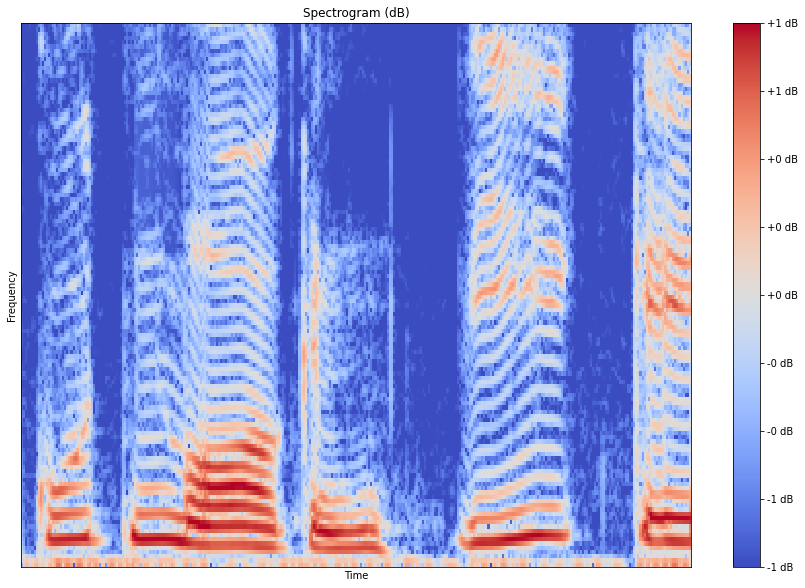

In [34]:
stfts=librosa.stft(sig,win_length=win_length,n_fft=n_fft, hop_length=hop_length)
plt.figure(figsize=FIG_SIZE)
magnitude = np.abs(stfts)
log_spectrogram = librosa.amplitude_to_db(magnitude)
log_spectrogram=librosa.util.normalize(log_spectrogram) # l-infinity norm

log_spectrogram = log_spectrogram[:128,:]


librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)




plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

In [36]:
D_harmonic, D_percussive = librosa.decompose.hpss(stfts)

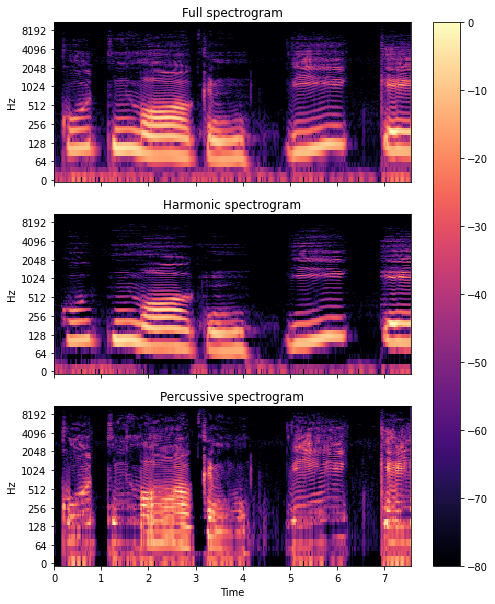

In [44]:
rp = np.max(np.abs(stfts))

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True,figsize=(8,10))


img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(stfts), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full spectrogram')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic spectrogram')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive spectrogram')
fig.colorbar(img, ax=ax)

# 평균,std 계산  - organics

In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torchvision import transforms, datasets
import cv2
from torchvision import transforms, datasets
import pandas as pd

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)



Using Pytorch version :  1.10.2  Device :  cuda


In [8]:
# 하이퍼 파라미터 서치 내용. 07.06
sr=16000
n_mels=128
win_length =  300
n_fft= 2048 
hop_length= 50 
f_max = 8000

In [2]:
sr = 16000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다. (stride)

In [3]:
#1. train, test 나누기

import os
from glob import glob
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split # train , test 분리에 사용.
import librosa, librosa.display


pathology = glob('D:/project/voice_pathology_ai/voice_data/organics/pathology/phrase/*.wav')
healthy = glob('D:/project/voice_pathology_ai/voice_data/organics/healthy/phrase/*.wav')
print("Pathology : ",len(pathology))
print("Healthy: ",len(healthy))

pathology= [ path.split("\\")[-1] for path in pathology] # path 데이터 변환.
healthy= [ path.split("\\")[-1] for path in healthy] # path 데이터 변환.
 # path 데이터 변환 #외부데이터로 가져오기위해서, 번호만 남긴다

    
X = pathology+healthy # path 데이터 합
print("총 데이터수 : ",len(X))
Y = [] # 라벨
for idx,x in enumerate(X):
    if idx<597:
        Y.append("pathology")
    else:
        Y.append("healthy")

X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=456)
#stratify를 넣어서, test에도 라벨별 잘 분류되게 한다.

print("---")
print("훈련 셋 : ",len(Y),Counter(Y))
print("테스트 셋 : ",len(Y_test),Counter(Y_test))
print("---")

Pathology :  597
Healthy:  634
총 데이터수 :  1231
---
훈련 셋 :  984 Counter({'healthy': 507, 'pathology': 477})
테스트 셋 :  247 Counter({'healthy': 127, 'pathology': 120})
---


In [4]:
import pickle

 
#load
with open("D:/project/voice_pathology_ai/voice_data/organics/phrase_sig_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)

    

In [5]:
phrase_dict

{'1040-phrase.wav': array([ 0.00019198,  0.00072988,  0.00077416, ...,  0.00010608,
        -0.00024016,  0.        ], dtype=float32),
 '1045-phrase.wav': array([-0.00301087, -0.00471198, -0.00369397, ...,  0.00877707,
         0.00960897,  0.        ], dtype=float32),
 '1046-phrase.wav': array([0.00087176, 0.00210954, 0.0017544 , ..., 0.02247776, 0.02591118,
        0.        ], dtype=float32),
 '1047-phrase.wav': array([-0.00218182, -0.0038823 , -0.00290296, ..., -0.00242876,
        -0.00317664,  0.        ], dtype=float32),
 '1048-phrase.wav': array([ 0.0023579 ,  0.00356342,  0.00313498, ..., -0.00019799,
        -0.0001939 ,  0.        ], dtype=float32),
 '1049-phrase.wav': array([ 0.00102539,  0.00163141,  0.00010494, ..., -0.01097467,
        -0.01524004,  0.        ], dtype=float32),
 '105-phrase.wav': array([0.00335465, 0.0054294 , 0.00509842, ..., 0.00176289, 0.00259548,
        0.        ], dtype=float32),
 '1052-phrase.wav': array([ 0.00707356,  0.01187314,  0.00938601, ..

In [52]:
sig =  phrase_dict['1040-phrase.wav'] # 16000hz 실시
length=29990 #300 padding을 위한 파라미터
pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
sig = pad1d(sig,length)

MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)


In [9]:

spectro_mean=[]
spectro_std=[]

mel_mean=[]
mel_std=[]

mfcc_mean=[]
mfcc_std=[]


for key in X:
    #print(key)
    sig =  phrase_dict[key] # 16000hz 실시
    length=sr*2 #300 padding을 위한 파라미터
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
    sig = pad1d(sig,length)
    sig = (sig-sig.mean())/sig.std()
    


    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)

    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,
                                                 sr=sr,
                                                 win_length=win_length,
                                                 hop_length=hop_length,
                                                 n_fft=n_fft,
                                                 fmax=f_max)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm

    #stft 300 FRAME이 되도록 패딩.
    #length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    #log_spectrogram = librosa.util.normalize(log_spectrogram) # l-infinity norm


    #padding
    #pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
    #log_spectrogram = pad2d(log_spectrogram, length)
    #mel_feature = pad2d(mel_feature, length)

    #MFCCs = pad2d(MFCCs, length) # mfcc 대신 encoder를 가져와서 해보자.
    log_spectrogram=log_spectrogram[:128,:]# 224 x 300 으로 사이즈 조절
    
    #print(value[0])
    spectro_mean.append(log_spectrogram.mean()) # spectrogram
    spectro_std.append(log_spectrogram.std()) # spectrogram
    
    #print(value[0])
    mel_mean.append(mel_feature.mean()) # spectrogram
    mel_std.append(mel_feature.std()) # spectrogram
    
    #print(value[0])
    mfcc_mean.append(MFCCs.mean()) # spectrogram
    mfcc_std.append(MFCCs.std()) # spectrogram    
    
    
    
    

print('spectro mean, std : ',np.mean(spectro_mean),np.mean(spectro_std))
print('mel mean, std : ',np.mean(mel_mean),np.mean(mel_std))
print('mfcc mean, std : ',np.mean(mfcc_mean),np.mean(mfcc_std))

spectro mean, std :  5.7733672506632745 20.26688946650548
mel mean, std :  -54.77237437940674 19.02269312937198
mfcc mean, std :  -0.07130741812252776 25.34690722925823


In [10]:
# mfcc 20 (2~21) norm 값 찾기.
# 0627 추가

sr=16000
win_length =  np.int64(sr/40) # 
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

spectro_mean=[]
spectro_std=[]

mel_mean=[]
mel_std=[]

mfcc_mean=[]
mfcc_std=[]


for key in X:
    #print(key)
    sig =  phrase_dict[key] # 16000hz 실시
    length=29990 #300 padding을 위한 파라미터
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
    sig = pad1d(sig,length)
    sig = (sig-sig.mean())/sig.std()
    


    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=21)
    MFCCs = MFCCs[1:,]



    #print(value[0])
    mfcc_mean.append(MFCCs.mean()) # spectrogram
    mfcc_std.append(MFCCs.std()) # spectrogram    
    
    

print('mfcc 20 mean, std : ',np.mean(mfcc_mean),np.mean(mfcc_std))

mfcc 20 mean, std :  6.998364525212681 33.33214444295116


In [5]:

sr=16000
win_length =  np.int64(sr/40) # 
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

spectro_mean=[]
spectro_std=[]

mel_mean=[]
mel_std=[]

mfcc_mean=[]
mfcc_std=[]


for key in X:
    #print(key)
    sig =  phrase_dict[key] # 16000hz 실시
    length=29990 #300 padding을 위한 파라미터
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
    sig = pad1d(sig,length)
    
    sig = librosa.effects.preemphasis(sig)    
    
    sig = (sig-sig.mean())/sig.std()
    


    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)

    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm

    #stft 300 FRAME이 되도록 패딩.
    #length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    #log_spectrogram = librosa.util.normalize(log_spectrogram) # l-infinity norm


    #padding
    #pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
    #log_spectrogram = pad2d(log_spectrogram, length)
    #mel_feature = pad2d(mel_feature, length)

    #MFCCs = pad2d(MFCCs, length) # mfcc 대신 encoder를 가져와서 해보자.
    log_spectrogram=log_spectrogram[:128,:]# 224 x 300 으로 사이즈 조절
    
    #print(value[0])
    spectro_mean.append(log_spectrogram.mean()) # spectrogram
    spectro_std.append(log_spectrogram.std()) # spectrogram
    
    #print(value[0])
    mel_mean.append(mel_feature.mean()) # spectrogram
    mel_std.append(mel_feature.std()) # spectrogram
    
    #print(value[0])
    mfcc_mean.append(MFCCs.mean()) # spectrogram
    mfcc_std.append(MFCCs.std()) # spectrogram    
    
    
    
    

print('spectro mean, std : ',np.mean(spectro_mean),np.mean(spectro_std))
print('mel mean, std : ',np.mean(mel_mean),np.mean(mel_std))
print('mfcc mean, std : ',np.mean(mfcc_mean),np.mean(mfcc_std))

spectro mean, std :  0.18445877507786745 15.70498345259471
mel mean, std :  -48.57786740353503 15.841430412008151
mfcc mean, std :  -1.6147918875282348 21.550443776314548


In [6]:
# min-max normalizer
from sklearn.preprocessing import MinMaxScaler
import pickle


sr=16000
win_length =  np.int64(sr/40) # 
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4

spectro=[]

mel=[]

mfcc=[]


for key in X:
    #print(key)
    sig =  phrase_dict[key] # 16000hz 실시
    length=29990 #300 padding을 위한 파라미터
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))        
    sig = pad1d(sig,length)
    sig = librosa.effects.preemphasis(sig)    
    sig = (sig-sig.mean())/sig.std()
    


    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)

    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm

    #stft 300 FRAME이 되도록 패딩.
    #length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    #log_spectrogram = librosa.util.normalize(log_spectrogram) # l-infinity norm


    #padding
    #pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
    #log_spectrogram = pad2d(log_spectrogram, length)
    #mel_feature = pad2d(mel_feature, length)

    #MFCCs = pad2d(MFCCs, length) # mfcc 대신 encoder를 가져와서 해보자.
    log_spectrogram=log_spectrogram[:128,:]# 224 x 300 으로 사이즈 조절
    
    
    
    #print(value[0])
    spectro.append(log_spectrogram.reshape(-1,1)) # spectrogram
    
    #print(value[0])
    mel.append(mel_feature.reshape(-1,1)) # spectrogram
    
    #print(value[0])
    mfcc.append(MFCCs.reshape(-1,1)) # spectrogram

scaler_spectro = MinMaxScaler()
scaler_mel = MinMaxScaler()
scaler_mfcc = MinMaxScaler()

scaler_spectro.fit(np.array(spectro).squeeze(2))
scaler_mel.fit(np.array(mel).squeeze(2))
scaler_mfcc.fit(np.array(mfcc).squeeze(2))


MinMaxScaler()

In [7]:
scaler_list = [scaler_spectro,scaler_mel,scaler_mfcc]

In [8]:
## Save pickle
with open("D:/project/voice_pathology_ai/voice_data/organics/phrase_scaler_preemp.pickle","wb") as fw:
    pickle.dump(scaler_list, fw)

# 데이터 피클 저장

In [5]:
#1. train, test 나누기

import os
from glob import glob
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split # train , test 분리에 사용.
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt


pathology = glob('./voice_data/fusion_new/pathology/phrase/*.wav')
healthy = glob('./voice_data/fusion_new/healthy/phrase/*.wav')
print("Pathology : ",len(pathology))
print("Healthy: ",len(healthy))

X = pathology+healthy # path 데이터 합
print("총 데이터수 : ",len(X))
Y = [] # 라벨
for idx,x in enumerate(X):
    if idx<1353:
        Y.append("pathology")
    else:
        Y.append("healthy")

X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=456)
#stratify를 넣어서, test에도 라벨별 잘 분류되게 한다.

print("---")
print("훈련 셋 : ",len(Y),Counter(Y))
print("테스트 셋 : ",len(Y_test),Counter(Y_test))
print("---")

Pathology :  1353
Healthy:  634
총 데이터수 :  1987
---
훈련 셋 :  1589 Counter({'pathology': 1082, 'healthy': 507})
테스트 셋 :  398 Counter({'pathology': 271, 'healthy': 127})
---


트레인셋 최대 길이 구하기.
phrase 데이터

In [ ]:
all_phrase = []
for path in X:
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    all_phrase.append(sig)
    
path_max=max([ len(samples) for samples in all_phrase])
print('phrase 데이터 최대길이',path_max)

a 데이터

In [46]:
all_a = []
for path in X:
    file_name = path.split("\\")[-1]
    kind = path.split('\\')[0].split('/')[3]
    path = "./voice_data/fusion/"+kind+'/a/'+file_name.split('-')[0]+'-a_n.wav'
    sig, sr = librosa.load(path, sr=50000)# 논문에서 f_s = 50 000HZ
    all_a.append(sig)
    
path_max=max([ len(samples) for samples in all_a])
print('a 데이터 최대길이',path_max)

a 데이터 최대길이 219501


In [55]:
# min max sclaer
#train set에서만 min max scaler를 fit 시킨다.
from sklearn.preprocessing import MinMaxScaler




mel_list = []
spectro_list = []
mfcc_list = []


#train set들만 모음.
for path in X:
    sig, sr = librosa.load(path, sr=50000)# 논문에서 f_s = 50 000HZ
    #원본 시그널 패딩
    length = 318596
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
    sig = pad1d(sig,length)  
    
    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    
    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    log_spectrogram=log_spectrogram[:128,:]# 128 x 300 으로 사이즈 조절
    
    #length = 300
    
    
    spec_min=np.min(log_spectrogram)
    mel_feature_min=np.min(mel_feature)
    MFCCs_min=np.min(MFCCs)
    
    #pad2d = lambda a, i,min_data: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.full((a.shape[0], i-a.shape[1]),min_data)))
    #log_spectrogram = pad2d(log_spectrogram, length,spec_min)
    #mel_feature = pad2d(mel_feature, length,mel_feature_min)
    #MFCCs = pad2d(MFCCs, length,MFCCs_min)
    
    
    
    spectro_list.append(log_spectrogram)
    mel_list.append(mel_feature)
    mfcc_list.append(MFCCs)
    




In [56]:
scaler_MFCC = MinMaxScaler()
scaler_mel = MinMaxScaler()
scaler_spec = MinMaxScaler()


spectro_list=np.array(spectro_list)
mel_list=np.array(mel_list)
mfcc_list=np.array(mfcc_list)

num_data = 1461

for ss in range(num_data):
    scaler_spec.partial_fit(spectro_list[ss,:, :])
    
for ss in range(num_data):
    scaler_mel.partial_fit(mel_list[ss,:, :])
    
for ss in range(num_data):
    scaler_MFCC.partial_fit(mfcc_list[ss,:, :])
    

    
for ss in range(num_data):
    spectro_list[ss, :, :]=scaler_spec.transform(spectro_list[ss, :, :])
    
for ss in range(num_data):
    mel_list[ss, :, :]=scaler_mel.transform(mel_list[ss, :, :])
    
    
for ss in range(num_data):
    mfcc_list[ss, :, :]=scaler_MFCC.transform(mfcc_list[ss, :, :])

In [31]:
phrase_dict=dict()
a_dict=dict()

In [32]:
import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=50000
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('./voice_data/fusion/pathology/phrase/*.wav')
healthy = glob('./voice_data/fusion/healthy/phrase/*.wav')


for path in pathology:
    file_name = path.split("\\")[-1]
    file_list = []
    
    sig, sr = librosa.load(path, sr=50000)# 논문에서 f_s = 50 000HZ
    #원본 시그널에서 PADDING
    length = 318596
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
    sig = pad1d(sig,length)
    
    
    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)
    
    #MFCCs = librosa.util.normalize(MFCCs) # l-infinity norm
    #MFCCs=cv2.resize(MFCCs,(MFCCs.shape[1],128),interpolation=cv2.INTER_LINEAR)# interpolate 적용해서 128 사이즈로


    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm
    
    #stft 300 FRAME이 되도록 패딩.
    length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    log_spectrogram=log_spectrogram[:128,:]# 128 x 300 으로 사이즈 조절
    
    
    #spec_min=np.min(log_spectrogram)
    #mel_feature_min=np.min(mel_feature)
    #MFCCs_min=np.min(MFCCs)
    
    #pad2d = lambda a, i,min_data: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.full((a.shape[0], i-a.shape[1]),min_data)))
    #log_spectrogram = pad2d(log_spectrogram, length,spec_min)
    #mel_feature = pad2d(mel_feature, length,mel_feature_min)
    #MFCCs = pad2d(MFCCs, length,MFCCs_min)
    
    
    #min max scale
    #log_spectrogram=scaler_spec.transform(log_spectrogram)
    #mel_feature=scaler_mel.transform(mel_feature)
    #MFCCs=scaler_MFCC.transform(MFCCs)
    
    
    
    file_list.append(log_spectrogram)
    file_list.append(mel_feature)
    file_list.append(MFCCs)
    phrase_dict[file_name] = file_list


for path in healthy:
    file_name = path.split("\\")[-1]
    file_list = []
    
    sig, sr = librosa.load(path, sr=50000)# 논문에서 f_s = 50 000HZ
    #원본 시그널에서 PADDING
    length = 318596
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
    sig = pad1d(sig,length)
    
    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)
    
    #MFCCs = librosa.util.normalize(MFCCs) # l-infinity norm
    #MFCCs=cv2.resize(MFCCs,(MFCCs.shape[1],128),interpolation=cv2.INTER_LINEAR)# interpolate 적용해서 128 사이즈로


    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm
    
    #stft 300 FRAME이 되도록 패딩.
    #length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    log_spectrogram=log_spectrogram[:128,:]# 128 x 300 으로 사이즈 조절
    
    
    #spec_min=np.min(log_spectrogram)
    #mel_feature_min=np.min(mel_feature)
    #MFCCs_min=np.min(MFCCs)
    
    #pad2d = lambda a, i,min_data: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.full((a.shape[0], i-a.shape[1]),min_data)))
    #log_spectrogram = pad2d(log_spectrogram, length,spec_min)
    #mel_feature = pad2d(mel_feature, length,mel_feature_min)
    #MFCCs = pad2d(MFCCs, length,MFCCs_min)
    
    
    #min max scale
    #log_spectrogram=scaler_spec.transform(log_spectrogram)
    #mel_feature=scaler_mel.transform(mel_feature)
    #MFCCs=scaler_MFCC.transform(MFCCs)
    
    
    
    file_list.append(log_spectrogram)
    file_list.append(mel_feature)
    file_list.append(MFCCs)
    phrase_dict[file_name] = file_list


In [33]:


pathology = glob('./voice_data/fusion/pathology/a/*.wav')
healthy = glob('./voice_data/fusion/healthy/a/*.wav')


for path in pathology:
    file_name = path.split("\\")[-1]
    file_list = []
    
    sig, sr = librosa.load(path, sr=50000)# 논문에서 f_s = 50 000HZ
    #원본 시그널에서 PADDING
    length = 318596
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
    sig = pad1d(sig,length)
    
    
    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)
    
    #MFCCs = librosa.util.normalize(MFCCs) # l-infinity norm
    #MFCCs=cv2.resize(MFCCs,(MFCCs.shape[1],128),interpolation=cv2.INTER_LINEAR)# interpolate 적용해서 128 사이즈로


    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm
    
    #stft 300 FRAME이 되도록 패딩.
    length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    log_spectrogram=log_spectrogram[:128,:]# 128 x 300 으로 사이즈 조절
    
    
    spec_min=np.min(log_spectrogram)
    mel_feature_min=np.min(mel_feature)
    MFCCs_min=np.min(MFCCs)
    
    #pad2d = lambda a, i,min_data: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.full((a.shape[0], i-a.shape[1]),min_data)))
    #log_spectrogram = pad2d(log_spectrogram, length,spec_min)
    #mel_feature = pad2d(mel_feature, length,mel_feature_min)
    #MFCCs = pad2d(MFCCs, length,MFCCs_min)
    
    
    #min max scale
    #log_spectrogram=scaler_spec.transform(log_spectrogram)
    #mel_feature=scaler_mel.transform(mel_feature)
    #MFCCs=scaler_MFCC.transform(MFCCs)
    
    
    
    file_list.append(log_spectrogram)
    file_list.append(mel_feature)
    file_list.append(MFCCs)
    a_dict[file_name] = file_list
    
    
for path in healthy:
    file_name = path.split("\\")[-1]
    file_list = []
    
    sig, sr = librosa.load(path, sr=50000)# 논문에서 f_s = 50 000HZ
    #원본 시그널에서 PADDING
    length = 318596
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
    sig = pad1d(sig,length)
    
    
    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)
    
    #MFCCs = librosa.util.normalize(MFCCs) # l-infinity norm
    #MFCCs=cv2.resize(MFCCs,(MFCCs.shape[1],128),interpolation=cv2.INTER_LINEAR)# interpolate 적용해서 128 사이즈로


    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm
    
    #stft 300 FRAME이 되도록 패딩.
    length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    log_spectrogram=log_spectrogram[:128,:]# 128 x 300 으로 사이즈 조절
    
    
    #spec_min=np.min(log_spectrogram)
    #mel_feature_min=np.min(mel_feature)
    #MFCCs_min=np.min(MFCCs)
    
    #pad2d = lambda a, i,min_data: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.full((a.shape[0], i-a.shape[1]),min_data)))
    #log_spectrogram = pad2d(log_spectrogram, length,spec_min)
    #mel_feature = pad2d(mel_feature, length,mel_feature_min)
    #MFCCs = pad2d(MFCCs, length,MFCCs_min)
    
    
    #min max scale
    #log_spectrogram=scaler_spec.transform(log_spectrogram)
    #mel_feature=scaler_mel.transform(mel_feature)
    #MFCCs=scaler_MFCC.transform(MFCCs)
    
    
    
    file_list.append(log_spectrogram)
    file_list.append(mel_feature)
    file_list.append(MFCCs)
    a_dict[file_name] = file_list


In [34]:
import pickle

 
## Save pickle
with open("./voice_data/fusion/phrase_dict.pickle","wb") as fw:
    pickle.dump(phrase_dict, fw)
#load
with open("./voice_data/fusion/phrase_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)

    

    
        
    
## Save pickle
with open("./voice_data/fusion/a_dict.pickle","wb") as fw:
    pickle.dump(a_dict, fw)
#load
with open("./voice_data/fusion/a_dict.pickle","rb") as fr:
    a_dict = pickle.load(fr)
    

In [6]:
import pickle

with open("./voice_data/fusion/phrase_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)
    
with open("./voice_data/fusion/a_dict.pickle","rb") as fr:
    a_dict = pickle.load(fr)

# ALL DATA 출력

In [2]:
# ALL DATA
#원본 시그널 출력하는 함수

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=50000
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('D:/project/voice_pathology_ai/voice_data/all_data/pathology/phrase/*.wav')
healthy = glob('D:/project/voice_pathology_ai/voice_data/all_data/healthy/phrase/*.wav')

phrase_dict=dict()

for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig
    


In [3]:
import pickle
#원본 시그널

 
## Save pickle
with open("D:/project/voice_pathology_ai/voice_data/all_data/phrase_sig_dict.pickle","wb") as fw:
    pickle.dump(phrase_dict, fw)
#load
with open("D:/project/voice_pathology_ai/voice_data/all_data/phrase_sig_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)


In [4]:
# a발음 원본 시그널
a_dict = dict()


#원본 시그널 출력하는 함수

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=16000
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('D:/project/voice_pathology_ai/voice_data/all_data/pathology/a/*.wav')
healthy = glob('D:/project/voice_pathology_ai/voice_data/all_data/pathology/a/*.wav')


for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    a_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    a_dict[file_name] = sig
    



In [5]:
import pickle
#원본 시그널

 
## Save pickle
with open("D:/project/voice_pathology_ai/voice_data/all_data/a_sig_dict.pickle","wb") as fw:
    pickle.dump(phrase_dict, fw)
#load
with open("D:/project/voice_pathology_ai/voice_data/all_data/a_sig_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)


# Fusion data 출력

In [3]:

#원본 시그널 출력하는 함수

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=50000
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('./voice_data/fusion_new/pathology/phrase/*.wav')
healthy = glob('./voice_data/fusion_new/healthy/phrase/*.wav')

phrase_dict=dict()

for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig
    


In [4]:
import pickle
#원본 시그널

 
## Save pickle
with open("./voice_data/fusion_new/phrase_sig_dict.pickle","wb") as fw:
    pickle.dump(phrase_dict, fw)
#load
with open("./voice_data/fusion_new/phrase_sig_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)


In [7]:
# a발음 원본 시그널
a_dict = dict()


#원본 시그널 출력하는 함수

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=16000
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('./voice_data/fusion_new/pathology/a/*.wav')
healthy = glob('./voice_data/fusion_new/healthy/a/*.wav')


for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    a_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    a_dict[file_name] = sig
    



In [8]:
import pickle
#원본 시그널

 
## Save pickle
with open("./voice_data/fusion_new/a_sig_dict.pickle","wb") as fw:
    pickle.dump(a_dict, fw)
#load
with open("./voice_data/fusion_new/a_sig_dict.pickle","rb") as fr:
    a_dict = pickle.load(fr)


# Organic data 출력

In [ ]:

#원본 시그널 출력하는 함수

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=16000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('./voice_data/organics/pathology/phrase/*.wav')
healthy = glob('./voice_data/organics/healthy/phrase/*.wav')

phrase_dict=dict()

for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig
    


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\USER\AppData\Local\Temp/ipykernel_17588/3569332557.py", line 32, in <module>
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
  File "C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\librosa\core\audio.py", line 181, in load
    y = resample(y, orig_sr=sr_native, target_sr=sr, res_type=res_type)
  File "C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\librosa\core\audio.py", line 613, in resample
    y_hat = resampy.resample(y, orig_sr, target_sr, filter=res_type, axis=-1)
  File "C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\resampy\core.py", line 120, in resample
    resample_f(x_2d, y_2d, sample_ratio, interp_win, interp_delta, precision)
KeyboardInterrupt

During handling of the above exception, another exce

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\USER\AppData\Local\Temp/ipykernel_17588/3569332557.py", line 32, in <module>
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
  File "C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\librosa\core\audio.py", line 181, in load
    y = resample(y, orig_sr=sr_native, target_sr=sr, res_type=res_type)
  File "C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\librosa\core\audio.py", line 613, in resample
    y_hat = resampy.resample(y, orig_sr, target_sr, filter=res_type, axis=-1)
  File "C:\Users\USER\anaconda3\envs\local_torch\lib\site-packages\resampy\core.py", line 120, in resample
    resample_f(x_2d, y_2d, sample_ratio, interp_win, interp_delta, precision)
KeyboardInterrupt

During handling of the above exception, another exce

In [6]:

#원본 시그널 출력하는 함수
# SR =50000

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=50000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('./voice_data/organics/pathology/phrase/*.wav')
healthy = glob('./voice_data/organics/healthy/phrase/*.wav')

phrase_dict=dict()

for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig
    


In [11]:
import pickle
#원본 시그널

 
## Save pickle
with open("./voice_data/organics/phrase_sig_dict_50000.pickle","wb") as fw:
    pickle.dump(phrase_dict, fw)
#load
with open("./voice_data/organics/phrase_sig_dict_50000.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)


In [61]:

#원본 시그널 출력하는 함수
# SR = 32000

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=32000


pathology = glob('./voice_data/organics/pathology/phrase/*.wav')
healthy = glob('./voice_data/organics/healthy/phrase/*.wav')

phrase_dict=dict()

for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig
    


In [62]:
import pickle
#원본 시그널

 
## Save pickle
with open("./voice_data/organics/phrase_sig_dict_32000.pickle","wb") as fw:
    pickle.dump(phrase_dict, fw)
#load
with open("./voice_data/organics/phrase_sig_dict_32000.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)


In [13]:

#원본 시그널 출력하는 함수
#표준화 추가 


import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=50000
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('./voice_data/organics/pathology/phrase/*.wav')
healthy = glob('./voice_data/organics/healthy/phrase/*.wav')

phrase_dict=dict()

for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    sig=(sig-np.mean(sig))/np.std(sig)
    
    phrase_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    sig=(sig-np.mean(sig))/np.std(sig)
    phrase_dict[file_name] = sig
    


KeyboardInterrupt: 

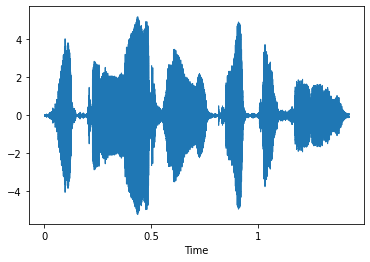

In [18]:
librosa.display.waveshow((sig-np.mean(sig))/np.std(sig))

In [11]:
import pickle
#원본 시그널

 
## Save pickle
with open("./voice_data/organics/phrase_sig_dict.pickle","wb") as fw:
    pickle.dump(phrase_dict, fw)
#load
with open("./voice_data/organics/phrase_sig_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)


In [12]:
# a발음 원본 시그널
a_dict = dict()


#원본 시그널 출력하는 함수

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=16000
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('./voice_data/organics/pathology/a/*.wav')
healthy = glob('./voice_data/organics/healthy/a/*.wav')


for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    a_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    a_dict[file_name] = sig
    



In [13]:
import pickle
#원본 시그널

 
## Save pickle
with open("./voice_data/organics/a_sig_dict.pickle","wb") as fw:
    pickle.dump(a_dict, fw)
#load
with open("./voice_data/organics/a_sig_dict.pickle","rb") as fr:
    a_dict = pickle.load(fr)


# Organic fusion set

In [1]:

#원본 시그널 출력하는 함수

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=50000
win_length =  np.int64(50000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('./voice_data/organics_fusion/pathology/phrase/*.wav')
healthy = glob('./voice_data/organics_fusion/healthy/phrase/*.wav')

phrase_dict=dict()

for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=16000)# 논문에서 f_s = 50 000HZ
    phrase_dict[file_name] = sig
    


In [2]:
import pickle
#원본 시그널

 
## Save pickle
with open("./voice_data/organics_fusion/phrase_sig_dict.pickle","wb") as fw:
    pickle.dump(phrase_dict, fw)
#load
with open("./voice_data/organics_fusion/phrase_sig_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)


In [3]:
# a발음 원본 시그널
a_dict = dict()


#원본 시그널 출력하는 함수

import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=16000
win_length =  np.int64(16000/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.


pathology = glob('./voice_data/organics_fusion/pathology/a/*.wav')
healthy = glob('./voice_data/organics_fusion/healthy/a/*.wav')


for path in pathology:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    a_dict[file_name] = sig


for path in healthy:
    file_name = path.split("\\")[-1]
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    a_dict[file_name] = sig
    



In [4]:
import pickle
#원본 시그널

 
## Save pickle
with open("./voice_data/organics_fusion/a_sig_dict.pickle","wb") as fw:
    pickle.dump(a_dict, fw)
#load
with open("./voice_data/organics_fusion/a_sig_dict.pickle","rb") as fr:
    a_dict = pickle.load(fr)


## organic fusion set  전처리

In [8]:
import pickle

with open("./voice_data/organics_fusion/phrase_sig_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)

with open("./voice_data/organics_fusion/a_sig_dict.pickle","rb") as fr:
    a_dict = pickle.load(fr)


In [10]:
import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=16000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.

pathology = glob('./voice_data/organics_fusion/pathology/phrase/*.wav')
healthy = glob('./voice_data/organics_fusion/healthy/phrase/*.wav')

phrase_dict=dict()



for path in pathology:
    file_name = path.split("\\")[-1]
    file_list = []
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    #원본 시그널에서 PADDING
    length = 101951
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
    sig = pad1d(sig,length)
    

    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)
    
    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    log_spectrogram=log_spectrogram[:128,:]# 128 x 300 으로 사이즈 조절
    
    
    file_list.append(log_spectrogram)
    file_list.append(mel_feature)
    file_list.append(MFCCs)
    phrase_dict[file_name] = file_list


for path in healthy:
    file_name = path.split("\\")[-1]
    file_list = []
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    #원본 시그널에서 PADDING
    length = 101951
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
    sig = pad1d(sig,length)
    
    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)

    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm
    
    #stft 300 FRAME이 되도록 패딩.
    #length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    log_spectrogram=log_spectrogram[:128,:]# 128 x 300 으로 사이즈 조절
    
    
    file_list.append(log_spectrogram)
    file_list.append(mel_feature)
    file_list.append(MFCCs)
    phrase_dict[file_name] = file_list

    



In [11]:
import os
from glob import glob
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


#scaler = MinMaxScaler()

#window sizde : FFT를 할때 참조할 그래프 길이 ( 프레임 하나당 sample 수 )
#자연어 처리에서는 25ms 사용. https://ahnjg.tistory.com/93
#초당 50000hz 중 1250개씩 윈도우 사이즈로 사용.
sr=16000
win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기(sample)를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다.
#hop_length가 mfcc의 frame수를 결정한다.

pathology = glob('./voice_data/organics_fusion/pathology/a/*.wav')
healthy = glob('./voice_data/organics_fusion/healthy/a/*.wav')

a_dict=dict()


for path in pathology:
    file_name = path.split("\\")[-1]
    file_list = []
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    #원본 시그널에서 PADDING
    length = 101951
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
    sig = pad1d(sig,length)
    
    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)
    
    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm
    
    #stft 300 FRAME이 되도록 패딩.
    length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    log_spectrogram=log_spectrogram[:128,:]# 128 x 300 으로 사이즈 조절
    
    
    file_list.append(log_spectrogram)
    file_list.append(mel_feature)
    file_list.append(MFCCs)
    a_dict[file_name] = file_list


for path in healthy:
    file_name = path.split("\\")[-1]
    file_list = []
    
    sig, sr = librosa.load(path, sr=sr)# 논문에서 f_s = 50 000HZ
    #원본 시그널에서 PADDING
    length = 101951
    pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
    sig = pad1d(sig,length)
    
    MFCCs = librosa.feature.mfcc(y=sig, sr=sr,win_length=win_length ,n_fft=n_fft, hop_length=hop_length, n_mfcc=128)

    stft = librosa.stft(sig, win_length=win_length,n_fft=n_fft, hop_length=hop_length)
    
    mel_feature = librosa.feature.melspectrogram(y=sig,sr=sr,hop_length=hop_length,n_fft=n_fft)
    mel_feature = librosa.core.power_to_db(mel_feature,ref=np.max)
    
    #mel_feature=librosa.util.normalize(mel_feature) # l-infinity norm
    
    #stft 300 FRAME이 되도록 패딩.
    #length = 300

    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    log_spectrogram=log_spectrogram[:128,:]# 128 x 300 으로 사이즈 조절
    
    
    file_list.append(log_spectrogram)
    file_list.append(mel_feature)
    file_list.append(MFCCs)
    a_dict[file_name] = file_list

    



In [12]:
import pickle

 
## Save pickle
with open("./voice_data/organics_fusion/phrase_msf_dict.pickle","wb") as fw:
    pickle.dump(phrase_dict, fw)
#load
with open("./voice_data/organics_fusion/phrase_msf_dict.pickle","rb") as fr:
    phrase_dict = pickle.load(fr)

    
## Save pickle
with open("./voice_data/organics_fusion/a_msf_dict.pickle","wb") as fw:
    pickle.dump(a_dict, fw)
#load
with open("./voice_data/organics_fusion/a_msf_dict.pickle","rb") as fr:
    a_dict = pickle.load(fr)
    

# frame size 확인

In [13]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)
sr=16000

#audio_path = './voice_data/disorder/export/blues.00000.wav'
#audio_path = './voice_data/disorder/export/105-phrase.wav'
audio_path = './voice_data/fusion/pathology/phrase/105-phrase.wav'
sig, sr = librosa.load(audio_path, sr=sr)# 논문에서 f_s = 50 000HZ
length=101951
pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
sig = pad1d(sig,length)  

#모음데이터는 1초에서 3초로 sampling 했다고 한다. (2초)

print(sig.shape,sr)
print(sig.shape[0]/sr)
sr_time=sig.shape[0]/sr




#155269 sample임을 알 수 있고
#sampling frame이 50000이다.
#시간 : 155269/50000

#음성 파일마다 sample수가 달라서, cnn은 통일해야한다.
#통일안하면, mfcc frame수도 달라진다.

(101951,) 16000
6.3719375


In [14]:

win_length =  np.int64(sr/40) # 1250
n_fft= win_length # WINDOWS SIZE중 사용할 길이. WINDOW SIZE가 넘어가면 나머지 것들은 zero padding
hop_length= np.int64( np.ceil(win_length/4) ) #  얼마만큼 시간 주기를 이동하면서 분석을 할 것인지. 일반적으로 window size의 1/4
#또는 10ms만큼으로 한다고 한다. (stride)
print(hop_length)

100


In [15]:
print(hop_length*300)

30000


In [33]:
sig, sr = librosa.load(audio_path, sr=sr)# 논문에서 f_s = 50 000HZ
length=29990
pad1d=lambda a, i: a[0:i] if a.shape[0] > i else np.hstack((a, np.zeros((i-a.shape[0]))))
sig = pad1d(sig,length)  

In [35]:
stfts=librosa.stft(sig,win_length=win_length,n_fft=n_fft, hop_length=hop_length)
#plt.figure(figsize=FIG_SIZE)
magnitude = np.abs(stfts)
log_spectrogram = librosa.amplitude_to_db(magnitude)
log_spectrogram.shape

(201, 300)

In [21]:
log_spectrogram.shape

(201, 1020)